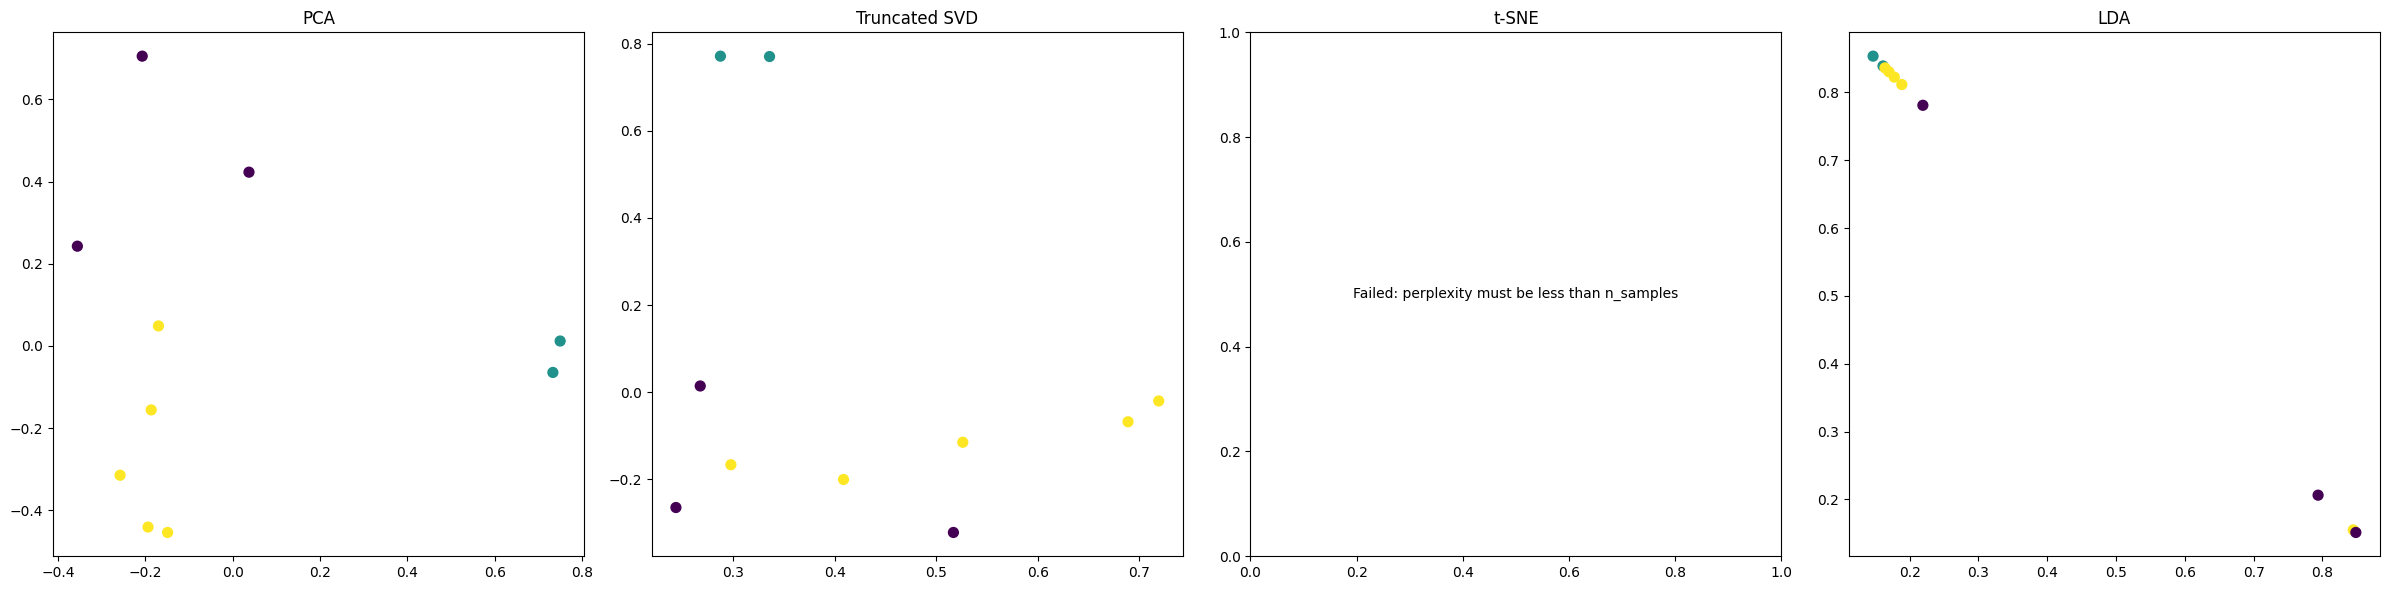

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import LatentDirichletAllocation

# Example text data
corpus = [
    "Machine learning is amazing!",
    "Deep learning is a subset of machine learning.",
    "Natural language processing is a fascinating field.",
    "I love studying AI and machine learning.",
    "Data science is closely related to machine learning.",
    "AI is transforming the world.",
    "Neural networks are a key concept in deep learning.",
    "Big data and AI are driving innovation.",
    "Machine learning models can predict outcomes.",
    "Text mining is a part of natural language processing.",
    "AI and robotics are revolutionizing industries.",
    "Deep learning frameworks like TensorFlow are widely used.",
    "Natural language understanding improves AI communication.",
    "Data-driven decisions are transforming businesses.",
    "Artificial intelligence applications span various domains.",
    "The future of AI relies on ethical development.",
    "Machine learning optimizes supply chain management.",
    "AI-generated content is becoming mainstream.",
    "Natural language models are improving search engines.",
    "Deep learning techniques power image recognition.",
    "AI accelerates the pace of scientific discovery.",
    "Collaborative AI tools enhance team productivity.",
    "Machine learning algorithms detect anomalies in data.",
    "Robotics and AI are creating smart assistants.",
    "Data visualization helps interpret AI predictions."
]

# Convert text data to high-dimensional vectors using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus).toarray()

# Dimensionality reduction methods
methods = {
    'PCA': PCA(n_components=2),
    'Truncated SVD': TruncatedSVD(n_components=2),
    't-SNE': TSNE(n_components=2, random_state=42),
    'LDA': LatentDirichletAllocation(n_components=2, random_state=0)
}

# Optional: Use clustering to color points by group
kmeans = KMeans(n_clusters=3, random_state=42)
y = kmeans.fit_predict(X)

# Plot results of each method
fig, axes = plt.subplots(1, 4, figsize=(24, 6))

for i, (name, model) in enumerate(methods.items()):
    try:
        X_transformed = model.fit_transform(X)
        axes[i].scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, cmap='viridis', s=50)
        axes[i].set_title(name)
    except Exception as e:
        axes[i].text(0.5, 0.5, f"Failed: {e}", ha='center', va='center', fontsize=10)
        axes[i].set_title(name)

plt.tight_layout()
plt.show()


以下是代码中降维模型的介绍以及适用场景：

---

### 1. **PCA（Principal Component Analysis）**
   - **算法简介**：
     PCA 是一种线性降维技术，通过提取数据中最大的方差方向（主成分）来减少维度。它通过计算协方差矩阵的特征值和特征向量进行降维。
   - **适用场景**：
     - 数据分布近似线性。
     - 希望快速降低维度，同时保留大部分数据方差。
     - 用于理解数据的全局结构。

---

### 2. **Truncated SVD（Truncated Singular Value Decomposition）**
   - **算法简介**：
     Truncated SVD 是 SVD 的变体，适用于稀疏矩阵（如文本数据的词袋表示）。它通过保留前几个奇异值和奇异向量来降维。
   - **适用场景**：
     - 文本数据降维，例如 Latent Semantic Analysis (LSA)。
     - 需要对稀疏数据进行降维时使用。
     - 适用于处理大规模稀疏特征矩阵。

---

### 3. **t-SNE（t-Distributed Stochastic Neighbor Embedding）**
   - **算法简介**：
     t-SNE 是一种非线性降维技术，通过最小化高维空间和低维空间中点对相似性的差异来保留局部邻域结构。它特别适合于可视化。
   - **适用场景**：
     - 数据具有复杂的非线性结构。
     - 高维数据的可视化（通常降到 2D 或 3D）。
     - 注重样本之间的局部关系而非全局结构。

---

### 4. **LDA（Latent Dirichlet Allocation）**
   - **算法简介**：
     LDA 是一种生成模型，通常用于主题建模。它通过将文档表示为主题分布（主题与单词的概率分布）来降维。
   - **适用场景**：
     - 文本数据的主题建模和降维。
     - 适用于从文本中提取隐含主题的信息。
     - 用于需要生成可解释性强的降维结果的场景。

---

### 模型对比表：

| 方法       | 线性数据 | 非线性数据 | 文本数据 | 可视化需求 | 全局结构 | 局部结构 |
|------------|----------|------------|----------|------------|----------|----------|
| PCA        | ✔️        | ❌          | ✔️        | ❌          | ✔️        | ❌        |
| Truncated SVD | ✔️        | ❌          | ✔️        | ❌          | ✔️        | ❌        |
| t-SNE      | ❌        | ✔️          | ✔️        | ✔️          | ❌        | ✔️        |
| LDA        | ❌        | ❌          | ✔️        | ❌          | ✔️（主题） | ❌        |

---

